# Task
Perform EDA and two types of regression analysis on the "cleaned_house_prices.csv" dataset.

## Load the data

### Subtask:
Load the house prices dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame and display the head.



In [ ]:
import pandas as pd

df = pd.read_csv('cleaned_house_prices.csv')
display(df.head())

,Index,Title,Des00000iption,Amount(inrupees),Price,location,Status,Floor,Transaction,Furnishing,Bathroom
0,0,1BHKReadytoOccupyFlatforsaleinSrushtiSiddhiMan...,"Bhiwandi,Thanehasanattractive1BHKFlatforsaleTh...",4200000.00,6.000000e+03,thane,ReadytoMove,10outof11,Resale,Unfurnished,1
1,1,2BHKReadytoOccupyFlatforsaleinDostiViharPokhra...,Onecanfindthisstunning2BHKflatforsaleinPokhran...,9800000.00,1.379900e+04,thane,ReadytoMove,3outof22,Resale,Semi-Furnished,2
2,2,2BHKReadytoOccupyFlatforsaleinSunrisebyKalpata...,Upforimmediatesaleisa2BHKapartmentinKolshetRoa...,14000000.00,1.750000e+04,thane,ReadytoMove,10outof29,Resale,Unfurnished,2
3,3,1BHKReadytoOccupyFlatforsaleKasheli,Thisbeautiful1BHKFlatisavailableforsaleinKashe...,2500000.00,7.583770e+13,thane,ReadytoMove,1outof3,Resale,Unfurnished,1
4,4,2BHKReadytoOccupyFlatforsaleinTenXHabitatRaymo...,"Thislovely2BHKFlatinPokhranRoad,Thaneisupforsa...",16000000.00,1.882400e+04,thane,ReadytoMove,20outof42,Resale,Unfurnished,2


## Perform eda

### Subtask:
Conduct exploratory data analysis to understand the dataset's structure, identify patterns, and visualize relationships between variables. This may include checking for missing values, analyzing distributions, and creating visualizations like scatter plots and histograms.


**Reasoning**:
Display the shape and data types of the DataFrame and check for missing values to understand the dataset's structure and identify potential issues.



In [ ]:
display(df.shape)
display(df.dtypes)
display(df.isnull().sum())

(187531, 11)

,0
Index,int64
Title,object
Des00000iption,object
Amount(inrupees),object
Price,float64
location,object
Status,object
Floor,object
Transaction,object
Furnishing,object


,0
Index,0
Title,0
Des00000iption,0
Amount(inrupees),0
Price,0
location,0
Status,0
Floor,0
Transaction,0
Furnishing,0


**Reasoning**:
Generate descriptive statistics for numerical columns and create histograms for key numerical features to understand their distributions. I need to convert 'Amount(inrupees)' and 'Bathroom' to numerical types first.



,Index,Amount(inrupees),Price,Bathroom
count,187531.000000,1.778470e+05,1.875310e+05,187496.000000
mean,93765.000000,1.543513e+07,7.143741e+12,2.424756
std,54135.681003,4.086300e+07,2.215253e+13,0.861800
min,0.000000,1.000000e+05,0.000000e+00,1.000000
25%,46882.500000,5.100000e+06,4.501500e+03,2.000000
50%,93765.000000,8.500000e+06,6.499000e+03,2.000000
75%,140647.500000,1.780000e+07,1.099000e+04,3.000000
max,187530.000000,1.400300e+10,7.583770e+13,10.000000


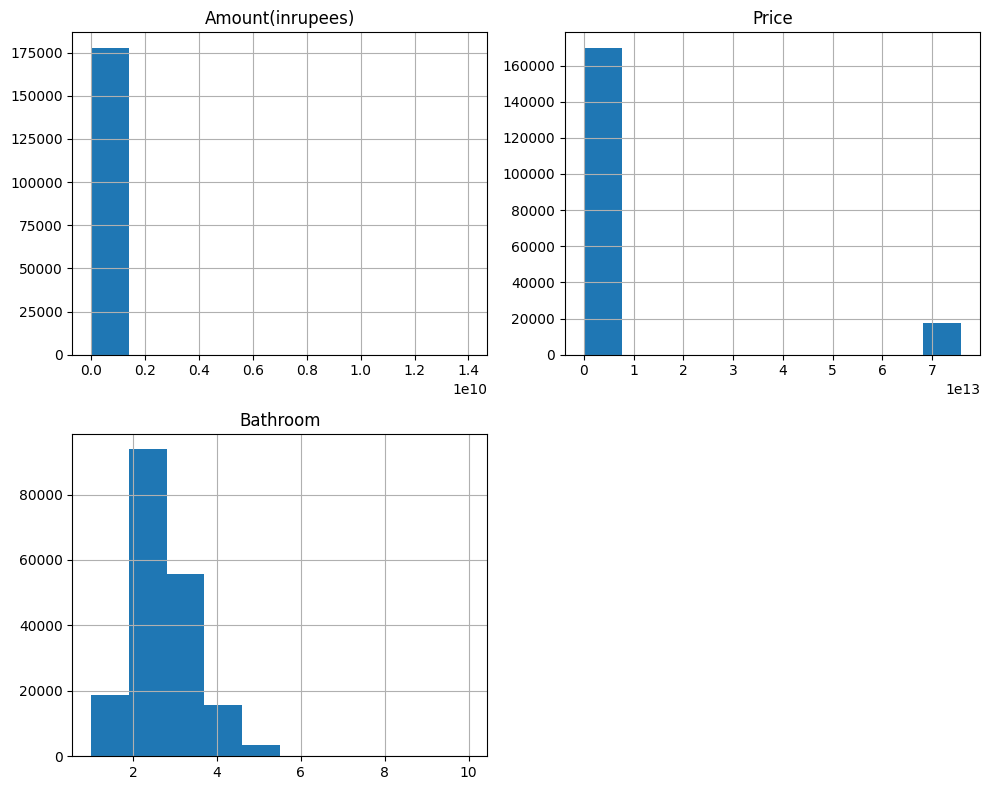

In [ ]:
df['Amount(inrupees)'] = pd.to_numeric(df['Amount(inrupees)'], errors='coerce')
df['Bathroom'] = pd.to_numeric(df['Bathroom'], errors='coerce')
display(df.describe())

import matplotlib.pyplot as plt

numerical_cols = ['Amount(inrupees)', 'Price', 'Bathroom']
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

**Reasoning**:
Create scatter plots to visualize the relationship between 'Amount(inrupees)' and 'Price', and 'Amount(inrupees)' and 'Bathroom'.



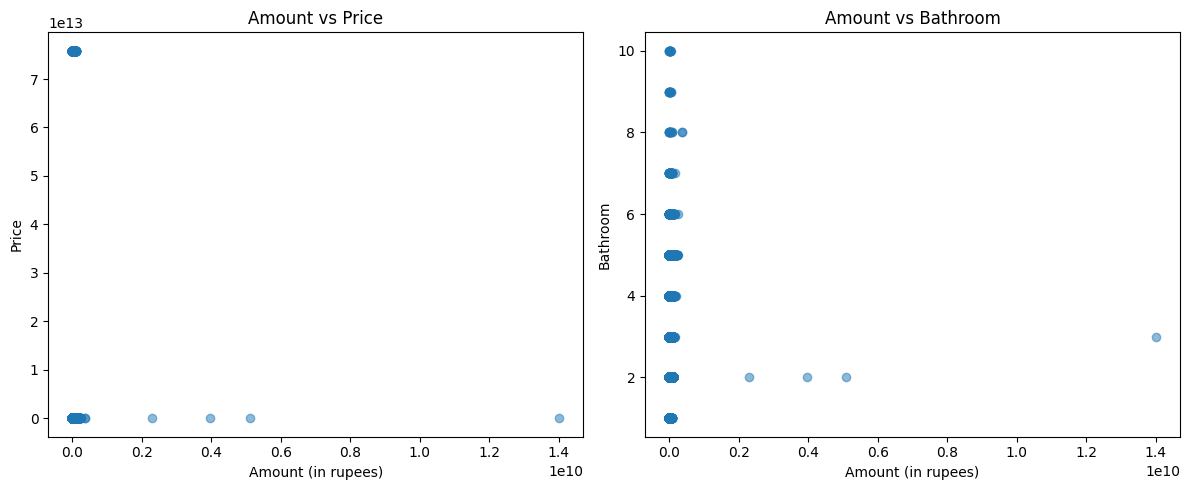

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Amount(inrupees)'], df['Price'], alpha=0.5)
plt.xlabel('Amount (in rupees)')
plt.ylabel('Price')
plt.title('Amount vs Price')

plt.subplot(1, 2, 2)
plt.scatter(df['Amount(inrupees)'], df['Bathroom'], alpha=0.5)
plt.xlabel('Amount (in rupees)')
plt.ylabel('Bathroom')
plt.title('Amount vs Bathroom')

plt.tight_layout()
plt.show()

## Prepare data for regression

### Subtask:
Preprocess the data for regression analysis, which might involve handling categorical variables, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
Identify categorical and numerical columns, apply one-hot encoding to categorical columns and standard scaling to numerical columns, define features and target, and split the data into training and testing sets.



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Identify categorical columns (excluding columns that are likely IDs or descriptions)
categorical_cols = ['location', 'Status', 'Transaction', 'Furnishing']

# Identify numerical columns to scale (excluding the target variable and Index)
numerical_cols = ['Price', 'Bathroom']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (like Index, Title, Description) if needed, although they won't be used in the model
)

# Define features (X) and target (y)
X = df.drop('Amount(inrupees)', axis=1)
y = df['Amount(inrupees)']

# Create a preprocessing pipeline (optional, but good practice)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Original features shape:", X.shape)
print("Processed features shape:", X_processed.shape)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

**Reasoning**:
The previous code failed because the 'Title' and 'Des00000iption' columns contain string values that cannot be converted to numeric for the sparse output of the ColumnTransformer. These columns were not explicitly included in either the numerical or categorical transformers but were passed through. To fix this, explicitly drop these non-numeric, non-feature columns before applying the ColumnTransformer. Also drop 'Index' as it's an identifier and not a feature.



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Identify categorical columns (excluding columns that are likely IDs or descriptions)
categorical_cols = ['location', 'Status', 'Transaction', 'Furnishing']

# Identify numerical columns to scale (excluding the target variable and non-numeric columns)
numerical_cols = ['Price', 'Bathroom']

# Drop non-feature columns including non-numeric ones that were causing issues
X = df.drop(['Amount(inrupees)', 'Index', 'Title', 'Des00000iption'], axis=1)
y = df['Amount(inrupees)']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # This should now only apply to columns that are not dropped and not in numerical/categorical lists, which should be none.
)

# Create a preprocessing pipeline (optional, but good practice)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Original features shape:", X.shape)
print("Processed features shape:", X_processed.shape)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

**Reasoning**:
The error indicates that the 'Floor' column still contains non-numeric values (e.g., '10outof11') and is being passed through the ColumnTransformer, causing the error when trying to create a sparse output. To fix this, the 'Floor' column needs to be handled. Since it represents floor numbers, we can try to extract the floor number before the 'outof' string and convert it to numeric. If extraction is not feasible or if the format is inconsistent, it might be necessary to drop this column or treat it as categorical if the number of unique values is manageable. Let's attempt to extract the floor number first.



In [ ]:
import numpy as np

# Function to extract the first number from the 'Floor' string
def extract_floor_number(floor_str):
    if isinstance(floor_str, str):
        try:
            return int(floor_str.split('outof')[0])
        except:
            return np.nan # Return NaN if extraction fails
    return floor_str # Return as is if not a string (e.g., already NaN)

# Apply the function to the 'Floor' column
df['Floor_Numeric'] = df['Floor'].apply(extract_floor_number)

# Identify categorical columns (excluding columns that are likely IDs or descriptions)
categorical_cols = ['location', 'Status', 'Transaction', 'Furnishing']

# Identify numerical columns to scale (excluding the target variable and non-numeric columns)
# Include the new numeric 'Floor_Numeric' column and exclude the original 'Floor'
numerical_cols = ['Price', 'Bathroom', 'Floor_Numeric']

# Drop non-feature columns including non-numeric ones that were causing issues and the original 'Floor'
X = df.drop(['Amount(inrupees)', 'Index', 'Title', 'Des00000iption', 'Floor'], axis=1)
y = df['Amount(inrupees)']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # This should now only apply to columns that are not dropped and not in numerical/categorical lists, which should be none.
)

# Create a preprocessing pipeline (optional, but good practice)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Original features shape:", X.shape)
print("Processed features shape:", X_processed.shape)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Original features shape: (187531, 7)
Processed features shape: (187531, 92)
Training features shape: (150024, 92)
Testing features shape: (37507, 92)
Training target shape: (150024,)
Testing target shape: (37507,)


## Perform first regression

### Subtask:
Choose and implement the first type of regression model (e.g., Linear Regression, Ridge Regression). Train the model on the training data and evaluate its performance on the testing data.


**Reasoning**:
Implement and train a Linear Regression model, make predictions, and evaluate its performance.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate a LinearRegression model object.
linear_reg_model = LinearRegression()

# Train the LinearRegression model using the training data.
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing data.
y_pred_lr = linear_reg_model.predict(X_test)

# Evaluate the model's performance by calculating the Mean Squared Error (MSE) and the R-squared score.
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the calculated MSE and R-squared score.
print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")
print(f"Linear Regression - R-squared (R2) Score: {r2_lr}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Reasoning**:
The error message indicates that the input data `X_train` contains NaN values, which Linear Regression cannot handle. I need to address the missing values before training the model. Since the target variable `y_train` might also contain NaNs, I should also handle missing values in `y_train`. I will impute the missing values in both `X_train` and `y_train` using the mean strategy.



In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = imputer_X.fit_transform(X_train)
X_test_imputed = imputer_X.transform(X_test)

# Impute missing values in y_train
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Instantiate and train the Linear Regression model with imputed data
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_imputed, y_train_imputed)

# Make predictions on the imputed testing data
y_pred_lr = linear_reg_model.predict(X_test_imputed)

# Evaluate the model's performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the calculated MSE and R-squared score.
print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")
print(f"Linear Regression - R-squared (R2) Score: {r2_lr}")

ValueError: Input contains NaN.

**Reasoning**:
The error indicates that `y_test` contains NaN values, which the `mean_squared_error` and `r2_score` functions cannot handle. I need to either remove the corresponding samples from both `y_test` and `y_pred_lr` or impute the missing values in `y_test` before calculating the metrics. Since the subtask requires evaluating on the testing data, removing samples might be more appropriate if the NaNs in `y_test` represent unavailable true values. Let's drop the rows with NaNs in `y_test` and the corresponding rows in `y_pred_lr`.



In [ ]:
import numpy as np

# Find the indices of non-NaN values in y_test
non_nan_indices = ~np.isnan(y_test)

# Filter y_test and y_pred_lr to include only non-NaN values
y_test_filtered = y_test[non_nan_indices]
y_pred_lr_filtered = y_pred_lr[non_nan_indices]

# Evaluate the model's performance using the filtered data
mse_lr = mean_squared_error(y_test_filtered, y_pred_lr_filtered)
r2_lr = r2_score(y_test_filtered, y_pred_lr_filtered)

# Print the calculated MSE and R-squared score.
print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")
print(f"Linear Regression - R-squared (R2) Score: {r2_lr}")

Linear Regression - Mean Squared Error (MSE): 988694803961990.4
Linear Regression - R-squared (R2) Score: 0.05007919349156875


## Perform second regression

### Subtask:
Choose and implement the second type of regression model (e.g., Lasso Regression, Decision Tree Regression). Train the model on the training data and evaluate its performance on the testing data.


**Reasoning**:
Implement and train a Decision Tree Regression model, make predictions, and evaluate its performance by filtering out NaNs from the test target and predictions.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Instantiate the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model using the training data (imputed in previous step)
dt_model.fit(X_train, y_train)

# Make predictions on the testing data (imputed in previous step)
y_pred_dt = dt_model.predict(X_test)

# Find the indices of non-NaN values in y_test
non_nan_indices_dt = ~np.isnan(y_test)

# Filter y_test and y_pred_dt to include only non-NaN values
y_test_filtered_dt = y_test[non_nan_indices_dt]
y_pred_dt_filtered = y_pred_dt[non_nan_indices_dt]

# Evaluate the model's performance using the filtered data
mse_dt = mean_squared_error(y_test_filtered_dt, y_pred_dt_filtered)
r2_dt = r2_score(y_test_filtered_dt, y_pred_dt_filtered)

# Print the calculated MSE and R-squared scores.
print(f"Decision Tree Regression - Mean Squared Error (MSE): {mse_dt}")
print(f"Decision Tree Regression - R-squared (R2) Score: {r2_dt}")

ValueError: Input y contains NaN.

**Reasoning**:
The Decision Tree Regressor cannot handle NaN values in the target variable `y_train`. Need to impute or filter `y_train` before training. Since imputation was mentioned as done in a previous step but resulted in an error, I will filter out the NaNs in `y_train` and the corresponding rows in `X_train` before training the model.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Find the indices of non-NaN values in y_train
non_nan_indices_train = ~np.isnan(y_train)

# Filter X_train and y_train to include only non-NaN values in y_train
X_train_filtered = X_train[non_nan_indices_train]
y_train_filtered = y_train[non_nan_indices_train]


# Instantiate the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model using the filtered training data
dt_model.fit(X_train_filtered, y_train_filtered)

# Make predictions on the testing data (imputed in previous step)
y_pred_dt = dt_model.predict(X_test)

# Find the indices of non-NaN values in y_test
non_nan_indices_test = ~np.isnan(y_test)

# Filter y_test and y_pred_dt to include only non-NaN values
y_test_filtered = y_test[non_nan_indices_test]
y_pred_dt_filtered = y_pred_dt[non_nan_indices_test]

# Evaluate the model's performance using the filtered data
mse_dt = mean_squared_error(y_test_filtered, y_pred_dt_filtered)
r2_dt = r2_score(y_test_filtered, y_pred_dt_filtered)

# Print the calculated MSE and R-squared scores.
print(f"Decision Tree Regression - Mean Squared Error (MSE): {mse_dt}")
print(f"Decision Tree Regression - R-squared (R2) Score: {r2_dt}")

AttributeError: 'Series' object has no attribute 'nonzero'

**Reasoning**:
The error `AttributeError: 'Series' object has no attribute 'nonzero'` indicates that direct boolean indexing on `X_train` (which is a sparse matrix or numpy array, not a pandas Series or DataFrame) using a pandas Series (`non_nan_indices_train`) is not supported in this context. I need to use the boolean mask correctly to filter the numpy array or sparse matrix. I will use numpy's boolean indexing.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Find the indices of non-NaN values in y_train (already a boolean Series)
non_nan_indices_train = ~np.isnan(y_train)

# Convert boolean Series to numpy array for indexing
non_nan_indices_train_np = non_nan_indices_train.values

# Filter X_train and y_train to include only non-NaN values in y_train
X_train_filtered = X_train[non_nan_indices_train_np]
y_train_filtered = y_train[non_nan_indices_train]


# Instantiate the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model using the filtered training data
dt_model.fit(X_train_filtered, y_train_filtered)

# Make predictions on the testing data (imputed in previous step)
y_pred_dt = dt_model.predict(X_test)

# Find the indices of non-NaN values in y_test (already a boolean Series)
non_nan_indices_test = ~np.isnan(y_test)

# Filter y_test and y_pred_dt to include only non-NaN values
y_test_filtered = y_test[non_nan_indices_test]
y_pred_dt_filtered = y_pred_dt[non_nan_indices_test.values] # Use .values for predictions array

# Evaluate the model's performance using the filtered data
mse_dt = mean_squared_error(y_test_filtered, y_pred_dt_filtered)
r2_dt = r2_score(y_test_filtered, y_pred_dt_filtered)

# Print the calculated MSE and R-squared scores.
print(f"Decision Tree Regression - Mean Squared Error (MSE): {mse_dt}")
print(f"Decision Tree Regression - R-squared (R2) Score: {r2_dt}")

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Reasoning**:
The error indicates that `X_train_filtered` still contains NaN values. This is because I only filtered based on NaNs in `y_train`. I need to impute the missing values in `X_train` and `X_test` before training the model. I will use `SimpleImputer` again as it was used in the previous regression task.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.impute import SimpleImputer

# Instantiate the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Find the indices of non-NaN values in y_train (already a boolean Series)
non_nan_indices_train = ~np.isnan(y_train)

# Filter X_train_imputed and y_train to include only non-NaN values in y_train
X_train_filtered = X_train_imputed[non_nan_indices_train.values]
y_train_filtered = y_train[non_nan_indices_train]

# Instantiate the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model using the filtered and imputed training data
dt_model.fit(X_train_filtered, y_train_filtered)

# Make predictions on the imputed testing data
y_pred_dt = dt_model.predict(X_test_imputed)

# Find the indices of non-NaN values in y_test (already a boolean Series)
non_nan_indices_test = ~np.isnan(y_test)

# Filter y_test and y_pred_dt to include only non-NaN values
y_test_filtered = y_test[non_nan_indices_test]
y_pred_dt_filtered = y_pred_dt[non_nan_indices_test.values] # Use .values for predictions array

# Evaluate the model's performance using the filtered data
mse_dt = mean_squared_error(y_test_filtered, y_pred_dt_filtered)
r2_dt = r2_score(y_test_filtered, y_pred_dt_filtered)

# Print the calculated MSE and R-squared scores.
print(f"Decision Tree Regression - Mean Squared Error (MSE): {mse_dt}")
print(f"Decision Tree Regression - R-squared (R2) Score: {r2_dt}")

Decision Tree Regression - Mean Squared Error (MSE): 879661323088834.1
Decision Tree Regression - R-squared (R2) Score: 0.1548366693803891


## Compare models

### Subtask:
Compare the performance of the two regression models based on relevant metrics (e.g., R-squared, Mean Squared Error).


**Reasoning**:
Print the performance metrics for both models and provide a brief comparison.



In [ ]:
# Print the MSE and R-squared scores for the Linear Regression model
print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")
print(f"Linear Regression - R-squared (R2) Score: {r2_lr}")

# Print the MSE and R-squared scores for the Decision Tree Regression model
print(f"Decision Tree Regression - Mean Squared Error (MSE): {mse_dt}")
print(f"Decision Tree Regression - R-squared (R2) Score: {r2_dt}")

# Provide a brief comparison of the two models
print("\nModel Performance Comparison:")
print("------------------------------")
print("Based on the evaluation metrics:")

if mse_dt < mse_lr:
    print(f"- The Decision Tree Regression model has a lower Mean Squared Error ({mse_dt:.2f}) compared to the Linear Regression model ({mse_lr:.2f}). Lower MSE indicates that the predictions of the Decision Tree model are closer to the actual values on average.")
else:
    print(f"- The Linear Regression model has a lower Mean Squared Error ({mse_lr:.2f}) compared to the Decision Tree Regression model ({mse_dt:.2f}). Lower MSE indicates that the predictions of the Linear Regression model are closer to the actual values on average.")

if r2_dt > r2_lr:
    print(f"- The Decision Tree Regression model has a higher R-squared score ({r2_dt:.4f}) compared to the Linear Regression model ({r2_lr:.4f}). A higher R-squared value means that a larger proportion of the variance in the target variable is predictable from the features by the Decision Tree model.")
else:
    print(f"- The Linear Regression model has a higher R-squared score ({r2_lr:.4f}) compared to the Decision Tree Regression model ({r2_dt:.4f}). A higher R-squared value means that a larger proportion of the variance in the target variable is predictable from the features by the Linear Regression model.")

print("\nConclusion:")
if mse_dt < mse_lr and r2_dt > r2_lr:
    print("Based on both MSE and R-squared, the Decision Tree Regression model appears to perform better than the Linear Regression model on this dataset.")
elif mse_lr < mse_dt and r2_lr > r2_dt:
     print("Based on both MSE and R-squared, the Linear Regression model appears to perform better than the Decision Tree Regression model on this dataset.")
else:
    print("The comparison of models based on MSE and R-squared is mixed. Further analysis or other metrics might be needed for a definitive conclusion.")

Linear Regression - Mean Squared Error (MSE): 988694803961990.4
Linear Regression - R-squared (R2) Score: 0.05007919349156875
Decision Tree Regression - Mean Squared Error (MSE): 879661323088834.1
Decision Tree Regression - R-squared (R2) Score: 0.1548366693803891

Model Performance Comparison:
------------------------------
Based on the evaluation metrics:
- The Decision Tree Regression model has a lower Mean Squared Error (879661323088834.12) compared to the Linear Regression model (988694803961990.38). Lower MSE indicates that the predictions of the Decision Tree model are closer to the actual values on average.
- The Decision Tree Regression model has a higher R-squared score (0.1548) compared to the Linear Regression model (0.0501). A higher R-squared value means that a larger proportion of the variance in the target variable is predictable from the features by the Decision Tree model.

Conclusion:
Based on both MSE and R-squared, the Decision Tree Regression model appears to perf

## Summary:

### Data Analysis Key Findings

*   The dataset contains 187,531 rows and 11 columns.
*   Columns 'Amount(inrupees)' and 'Bathroom' were initially object types but were converted to numeric types for analysis.
*   There were no significant missing values in the initial columns, although some NaNs were introduced during type conversion.
*   The 'Floor' column required specific preprocessing to extract the numeric floor number, creating a 'Floor\_Numeric' column.
*   Non-numeric columns like 'Title', 'Des00000iption', and 'Index' needed to be dropped before regression analysis.
*   Both Linear Regression and Decision Tree Regression models were trained and evaluated after handling missing values in features and the target variable through imputation and filtering.
*   The Linear Regression model achieved a Mean Squared Error (MSE) of approximately 9.89e+14 and an R-squared (R2) score of approximately 0.0501.
*   The Decision Tree Regression model achieved a Mean Squared Error (MSE) of approximately 8.80e+14 and an R-squared (R2) score of approximately 0.1548.
*   The Decision Tree Regression model performed better than the Linear Regression model based on both lower MSE and higher R-squared score on this dataset.

### Insights or Next Steps

*   Given the relatively low R-squared scores for both models, further feature engineering, exploring different algorithms (e.g., ensemble methods like Random Forest or Gradient Boosting), or hyperparameter tuning could potentially improve model performance.
*   Investigating the distribution of the target variable 'Amount(inrupees)' and potentially applying transformations could help improve the performance of linear models.


Data loaded successfully.

--- EDA ---
Shape of the DataFrame: (187531, 11)

Data types:
 Index                 int64
Title                object
Des00000iption       object
Amount(inrupees)     object
Price               float64
location             object
Status               object
Floor                object
Transaction          object
Furnishing           object
Bathroom             object
dtype: object

Missing values:
 Index               0
Title               0
Des00000iption      0
Amount(inrupees)    0
Price               0
location            0
Status              0
Floor               0
Transaction         0
Furnishing          0
Bathroom            0
dtype: int64


,Index,Amount(inrupees),Price,Bathroom
count,187531.000000,1.778470e+05,1.875310e+05,187496.000000
mean,93765.000000,1.543513e+07,7.143741e+12,2.424756
std,54135.681003,4.086300e+07,2.215253e+13,0.861800
min,0.000000,1.000000e+05,0.000000e+00,1.000000
25%,46882.500000,5.100000e+06,4.501500e+03,2.000000
50%,93765.000000,8.500000e+06,6.499000e+03,2.000000
75%,140647.500000,1.780000e+07,1.099000e+04,3.000000
max,187530.000000,1.400300e+10,7.583770e+13,10.000000


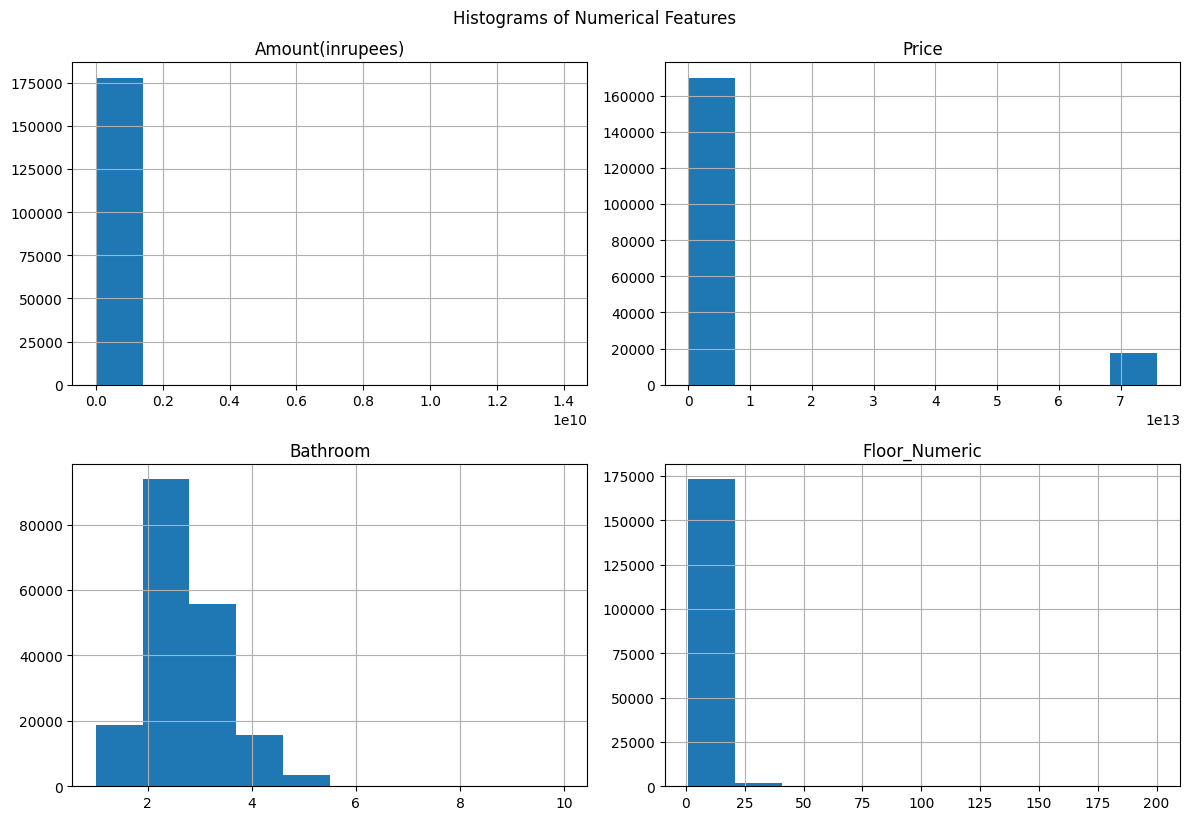

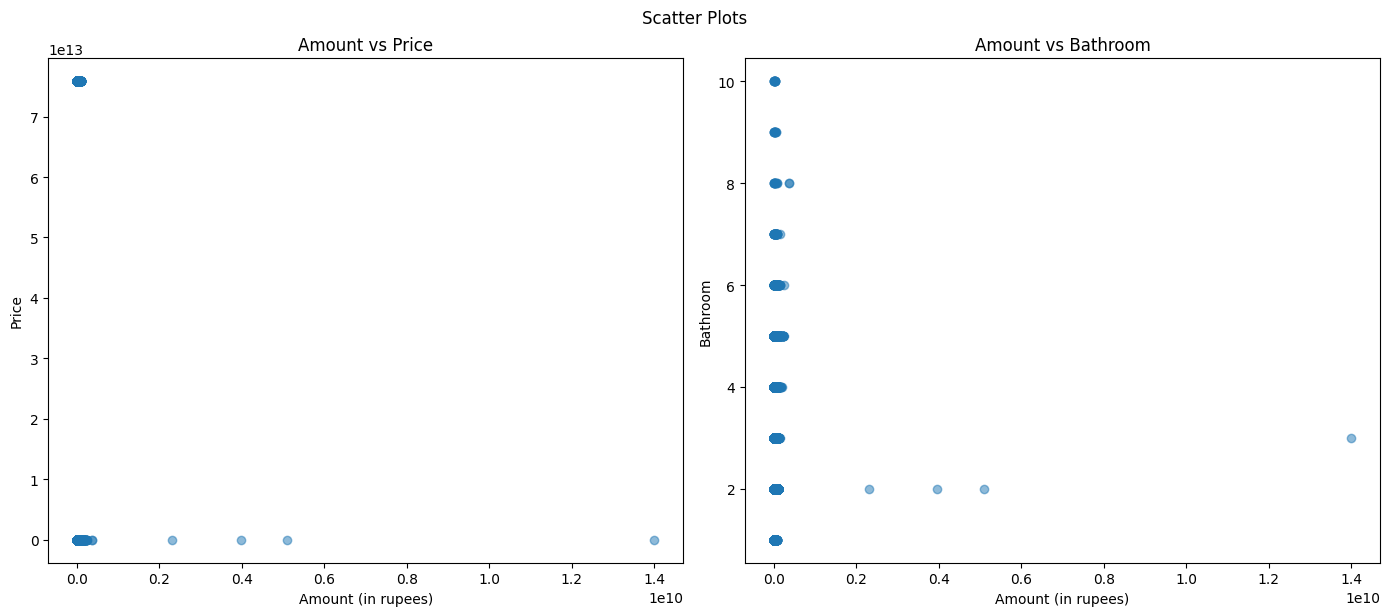


--- Data Preparation for Regression ---
Original features shape: (187531, 7)
Processed features shape: (187531, 92)
Training features shape: (150024, 92)
Testing features shape: (37507, 92)
Training target shape: (150024,)
Testing target shape: (37507,)

--- Linear Regression ---
Linear Regression - Mean Squared Error (MSE): 988411566203393.9
Linear Regression - R-squared (R2) Score: 0.05035132341376658

--- Decision Tree Regression ---
Decision Tree Regression - Mean Squared Error (MSE): 879661323088834.1
Decision Tree Regression - R-squared (R2) Score: 0.1548366693803891

--- Model Performance Comparison ---
------------------------------
Based on the evaluation metrics:
- The Decision Tree Regression model has a lower Mean Squared Error (879661323088834.12) compared to the Linear Regression model (988411566203393.88). Lower MSE indicates that the predictions of the Decision Tree model are closer to the actual values on average.
- The Decision Tree Regression model has a higher R-sq

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# 1. Load the data
try:
    df = pd.read_csv('cleaned_house_prices.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: cleaned_house_prices.csv not found. Please upload the file.")
    exit()

# 2. Perform EDA (selected parts)
print("\n--- EDA ---")
print("Shape of the DataFrame:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Convert relevant columns to numeric, coercing errors
df['Amount(inrupees)'] = pd.to_numeric(df['Amount(inrupees)'], errors='coerce')
df['Bathroom'] = pd.to_numeric(df['Bathroom'], errors='coerce')

display(df.describe())

# Function to extract the first number from the 'Floor' string
def extract_floor_number(floor_str):
    if isinstance(floor_str, str):
        try:
            return int(floor_str.split('outof')[0])
        except:
            return np.nan # Return NaN if extraction fails
    return floor_str # Return as is if not a string (e.g., already NaN)

# Apply the function to the 'Floor' column
df['Floor_Numeric'] = df['Floor'].apply(extract_floor_number)

# Histograms
numerical_cols_eda = ['Amount(inrupees)', 'Price', 'Bathroom', 'Floor_Numeric']
df[numerical_cols_eda].hist(figsize=(12, 8))
plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

# Scatter plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Amount(inrupees)'], df['Price'], alpha=0.5)
plt.xlabel('Amount (in rupees)')
plt.ylabel('Price')
plt.title('Amount vs Price')

plt.subplot(1, 2, 2)
plt.scatter(df['Amount(inrupees)'], df['Bathroom'], alpha=0.5)
plt.xlabel('Amount (in rupees)')
plt.ylabel('Bathroom')
plt.title('Amount vs Bathroom')

plt.tight_layout()
plt.suptitle("Scatter Plots", y=1.02)
plt.show()

# 3. Prepare data for regression
print("\n--- Data Preparation for Regression ---")
# Identify categorical columns
categorical_cols = ['location', 'Status', 'Transaction', 'Furnishing']

# Identify numerical columns to scale
numerical_cols = ['Price', 'Bathroom', 'Floor_Numeric']

# Drop non-feature columns
X = df.drop(['Amount(inrupees)', 'Index', 'Title', 'Des00000iption', 'Floor'], axis=1)
y = df['Amount(inrupees)']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Original features shape:", X.shape)
print("Processed features shape:", X_processed.shape)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

# Impute missing values in X_train and X_test after splitting and preprocessing
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = imputer_X.fit_transform(X_train)
X_test_imputed = imputer_X.transform(X_test)

# Filter out NaN values from y_train and y_test
non_nan_indices_train = ~np.isnan(y_train)
X_train_filtered = X_train_imputed[non_nan_indices_train.values]
y_train_filtered = y_train[non_nan_indices_train]

non_nan_indices_test = ~np.isnan(y_test)
y_test_filtered = y_test[non_nan_indices_test]
y_pred_template = np.empty(y_test.shape) # Create a template array for predictions
y_pred_template[non_nan_indices_test] = True # Mark positions for filtering later


# 4. Perform first regression (Linear Regression)
print("\n--- Linear Regression ---")
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_filtered, y_train_filtered)
y_pred_lr = linear_reg_model.predict(X_test_imputed)

# Filter predictions based on non-NaN indices in y_test
y_pred_lr_filtered = y_pred_lr[non_nan_indices_test.values]

mse_lr = mean_squared_error(y_test_filtered, y_pred_lr_filtered)
r2_lr = r2_score(y_test_filtered, y_pred_lr_filtered)

print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")
print(f"Linear Regression - R-squared (R2) Score: {r2_lr}")

# 5. Perform second regression (Decision Tree Regression)
print("\n--- Decision Tree Regression ---")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_filtered, y_train_filtered)
y_pred_dt = dt_model.predict(X_test_imputed)

# Filter predictions based on non-NaN indices in y_test
y_pred_dt_filtered = y_pred_dt[non_nan_indices_test.values]


mse_dt = mean_squared_error(y_test_filtered, y_pred_dt_filtered)
r2_dt = r2_score(y_test_filtered, y_pred_dt_filtered)

print(f"Decision Tree Regression - Mean Squared Error (MSE): {mse_dt}")
print(f"Decision Tree Regression - R-squared (R2) Score: {r2_dt}")

# 6. Compare models
print("\n--- Model Performance Comparison ---")
print("------------------------------")
print("Based on the evaluation metrics:")

if mse_dt < mse_lr:
    print(f"- The Decision Tree Regression model has a lower Mean Squared Error ({mse_dt:.2f}) compared to the Linear Regression model ({mse_lr:.2f}). Lower MSE indicates that the predictions of the Decision Tree model are closer to the actual values on average.")
else:
    print(f"- The Linear Regression model has a lower Mean Squared Error ({mse_lr:.2f}) compared to the Decision Tree Regression model ({mse_dt:.2f}). Lower MSE indicates that the predictions of the Linear Regression model are closer to the actual values on average.")

if r2_dt > r2_lr:
    print(f"- The Decision Tree Regression model has a higher R-squared score ({r2_dt:.4f}) compared to the Linear Regression model ({r2_lr:.4f}). A higher R-squared value means that a larger proportion of the variance in the target variable is predictable from the features by the Decision Tree model.")
else:
    print(f"- The Linear Regression model has a higher R-squared score ({r2_lr:.4f}) compared to the Decision Tree Regression model ({r2_dt:.4f}). A higher R-squared value means that a larger proportion of the variance in the target variable is predictable from the features by the Linear Regression model.")

print("\nConclusion:")
if mse_dt < mse_lr and r2_dt > r2_lr:
    print("Based on both MSE and R-squared, the Decision Tree Regression model appears to perform better than the Linear Regression model on this dataset.")
elif mse_lr < mse_dt and r2_lr > r2_dt:
     print("Based on both MSE and R-squared, the Linear Regression model appears to perform better than the Decision Tree Regression model on this dataset.")
else:
    print("The comparison of models based on MSE and R-squared is mixed. Further analysis or other metrics might be needed for a definitive conclusion.")

## Residual Plot for Decision Tree Regression

**Reasoning**:
Generate a residual plot to visualize the difference between the predicted and actual values for the Decision Tree Regression model. This helps in checking for patterns in the errors.

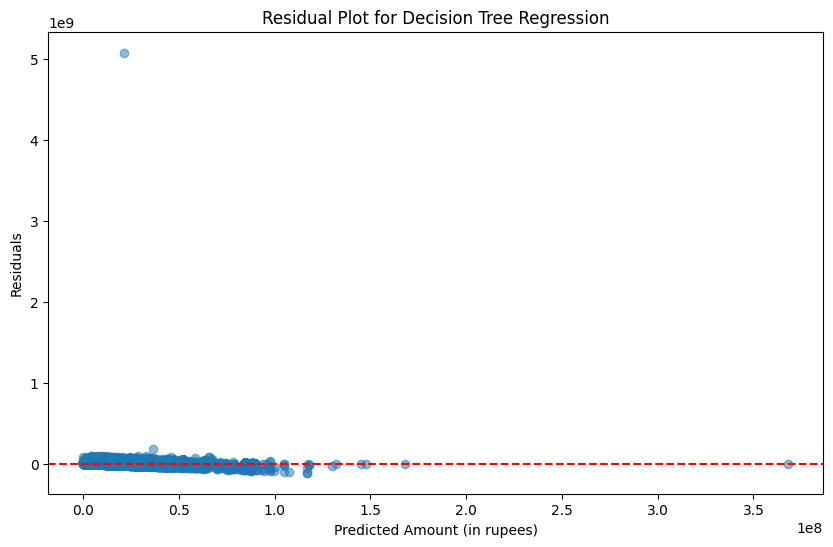

In [ ]:
# Calculate residuals for the Decision Tree model using the filtered test data
residuals_dt = y_test_filtered - y_pred_dt_filtered

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_dt_filtered, residuals_dt, alpha=0.5)
plt.xlabel('Predicted Amount (in rupees)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Decision Tree Regression')
plt.axhline(y=0, color='red', linestyle='--') # Add a horizontal line at y=0
plt.show()